In [1]:
import tensorflow as tf
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
mnist=tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [3]:
input_shape=(28,28,1)
X_train=X_train.reshape(len(X_train),28,28,1)
X_test=X_test.reshape(len(X_test),28,28,1)
X_train=X_train/255
X_test=X_test/255

In [4]:
y_train=tf.one_hot(y_train.astype(np.int32),depth=10)
y_test=tf.one_hot(y_test.astype(np.int32),depth=10)

In [5]:
batch_size=32
epochs=25
cnn=tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=input_shape))

C:\Users\gobi2\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [11]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [12]:
history=cnn.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.1)

Epoch 1/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - acc: 0.6807 - loss: 0.8635 - val_acc: 0.8545 - val_loss: 0.3784
Epoch 2/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - acc: 0.8442 - loss: 0.4174 - val_acc: 0.8845 - val_loss: 0.3081
Epoch 3/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - acc: 0.8705 - loss: 0.3469 - val_acc: 0.8902 - val_loss: 0.2769
Epoch 4/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - acc: 0.8842 - loss: 0.3131 - val_acc: 0.9047 - val_loss: 0.2561
Epoch 5/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - acc: 0.8886 - loss: 0.2977 - val_acc: 0.9118 - val_loss: 0.2400
Epoch 6/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - acc: 0.8946 - loss: 0.2822 - val_acc: 0.9127 - val_loss: 0.2421
Epoch 7/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - acc: 0.8988 - loss: 0.2693 - val_acc: 0.9173 - val_loss: 0.2239
Epoch 8/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - acc: 0.9057 - loss: 0.2534 - val_acc: 0.9193 - val_loss: 0.2206
Epoch 9/25
1688/1688 ━━━

In [13]:
print(cnn.evaluate(X_test,y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.9241 - loss: 0.2126
[0.20991486310958862, 0.9241999983787537]


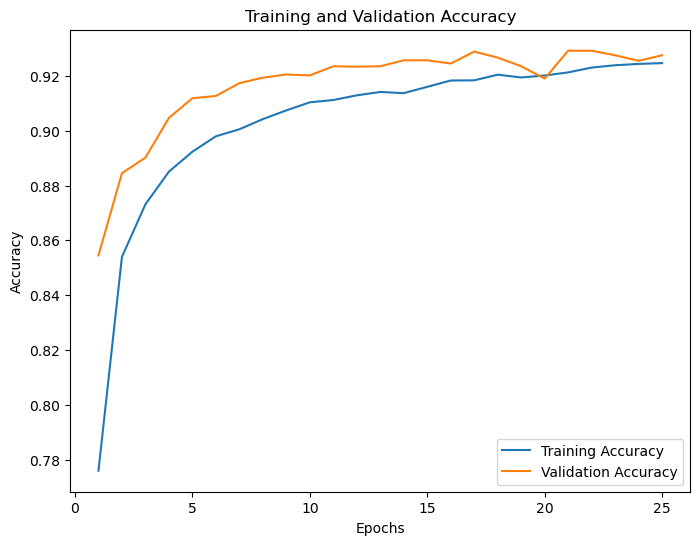

In [14]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
plt.figure(figsize=(8, 6))
plt.plot(range(1,epochs+1), accuracy, label='Training Accuracy')
plt.plot(range(1,epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
print(history.history.keys())


dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


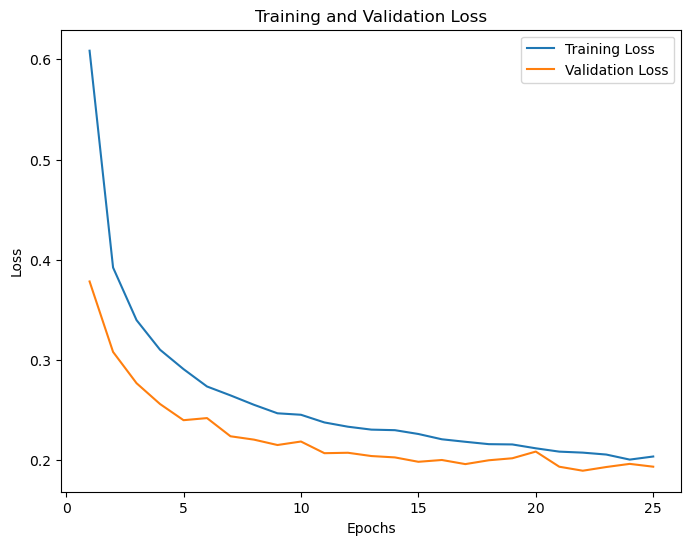

In [16]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 6))
plt.plot(range(1,epochs+1), train_loss, label='Training Loss')
plt.plot(range(1,epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - acc: 0.9241 - loss: 0.2126


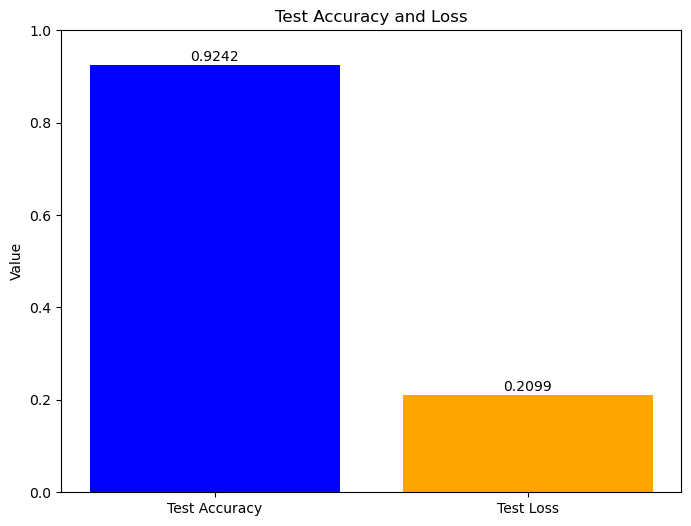

In [17]:
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)
metrics = ['Test Accuracy', 'Test Loss']
values = [test_accuracy, test_loss]
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'orange'])
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f'{value:.4f}', ha='center')
plt.title('Test Accuracy and Loss')
plt.ylabel('Value')
plt.ylim(0, 1)  
plt.show()
